> This assignment as two parts Section A and B. The first part is the implementation of function required in applying the CNN layers and the next section will be around the use of built in function of Tensorflow



`Before moving ahead as we have reached the stage of applying CNNs. We are going to deal with large number of parameters and hence more computational power. So you will need to connect runtime of collab to GPU: https://www.youtube.com/watch?v=-9CLfrZISRw`

### **BOTH THE SECTION CAN BE SOLVED INDEPENDENTLY** BUT SECTION A has **3X** more weightage than SECTION B doesn't have any code to write.

## **SECTION:A**

In [2]:
import numpy as np

### Q1: Complete the following function corr2d(X, K), which implements the cross correlation operation for matrix X and kernel K, both are two dimensional numpy arrays (height x width). The function should return a 2 dimensional numpy array which is the result of cross correlation operation between X and K. 

- not giving channels right now : assume channels = 1

In [3]:
def corr2d(X: np.array, K: np.array) -> np.array:
    X_height, X_width = X.shape
    
    if K.ndim == 1:
        K = K.reshape((1, K.shape[0]))
        K_height, K_width = 1, K.shape[1]
    else:
        K_height, K_width = K.shape
    
    output_height = X_height - K_height + 1
    output_width = X_width - K_width + 1
    output = np.zeros((output_height, output_width))
    
    for i in range(output_height):
        for j in range(output_width):
            output[i, j] = np.sum(X[i:i+K_height, j:j+K_width] * K)
    
    return output
    pass


In [4]:
X = np.array([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]], dtype=np.float32)
K = np.array([[0.0, 1.0], [2.0, 3.0]], dtype=np.float32)
print(corr2d(X, K)) # example done in class, try to print this and check if you get the right answer

[[19. 25.]
 [37. 43.]]


### now try to make a new function corr2d_multiple_input_channels(X, K) : where each X and K have the same number of channels, both of them are now 3 dimensional numpy arrays, the output should be a 2 dimensional numpy array (output_h, output_w).

- hint : Use the above corr2d function and read about np.stack

In [5]:
def corr2d_multiple_input_channels(X: np.array, K: np.array) -> np.array: 
    # write a function for this task
    num_input_channels, _, _ = X.shape
    output = None
    
    for i in range(num_input_channels):
        if output is None:
            output = corr2d(X[i], K[i])
        else:
            output += corr2d(X[i], K[i])
    
    return output

In [6]:
new_X = np.stack([X, X+1, X+2], axis=0) # stacking along a new dimension
new_K = np.stack([K, K+1, K+2], axis=0) 

print(f"new_X.shape = {new_X.shape}, new_K.shape = {new_K.shape}")
print(corr2d_multiple_input_channels(new_X, new_K))
# calculate the output by hand and then check whether you get the same answer
# answer should be a 2 dim np array : (output_height, output_width) 

new_X.shape = (3, 3, 3), new_K.shape = (3, 2, 2)
[[119. 149.]
 [209. 239.]]


### Write another function corr2d_mutli_in_out(X, K): where X (3 dim np array), K (4 dim numpy array), 0th dimension of K represents the number of kernel/filters we are using. Perform the cross correlation operation for K on X and return the output : 3 dim numpy array whose shape should be (num_output_channels, output_height, output_width)

- hint : use the above corr_2d_mutliple_input_channels(X, K) for each kernel in K and then stack them.

In [7]:
def corr2d_multi_in_out(X: np.array, K: np.array) -> np.array:
    # X -> (num_in_channels, n_h, n_w)
    # K -> (num_out_channels, num_in_channels, k_h, k_w)
    # output -> (num_out_channels, o_h, o_w)
    num_out_channels, num_in_channels, _, _ = K.shape
    output = None
    
    for i in range(num_out_channels):
        if output is None:
            output = corr2d_multiple_input_channels(X, K[i])
        else:
            output = np.dstack((output, corr2d_multiple_input_channels(X, K[i])))
    
    return output
    

In [8]:
my_K = np.stack([new_K, new_K+1, new_K+2, new_K + 3], axis=0) 
print(f"my_K.shape = {my_K.shape}")

print(corr2d_multi_in_out(new_X, my_K)) # cross check the calculation

my_K.shape = (4, 3, 2, 2)
[[[119. 155. 191. 227.]
  [149. 197. 245. 293.]]

 [[209. 281. 353. 425.]
  [239. 323. 407. 491.]]]


### Q2: What is the computational and statistical benefits of stride larger than 1?? (not more than 20 word answer for each)

### Q3: Now let's implement a model with just a single convolution layer, given X(input), Y(output) and K(kernel). Y is the output of the cross-correlation operation of K on X. You need to build a model to learn that kernel K.(try to print the kernel at each epoch)

- hint : conv_layer(output_channels = 1, input_channels = 1, kerenl_size=(1, 2), bias=False)

In [9]:
X = np.ones((6, 8), dtype=np.float32)
X[:, 2:6] = 0
print(X)

[[1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]]


In [10]:
K = np.array([1.0, -1.0], dtype=np.float32) # kernel, you need to learn this using a model
Y = corr2d(X, K) 
print(Y)

[[ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]]


In [11]:
X = X.reshape((1, 1, 6, 8)) # this will be the input to the model
Y = Y.reshape((1, 1, 6, 7)) # this is the output, to be used while calculation loss
lr = 3e-2 # use this learning rate

### Q4: Complete the following function max_pool2d(X, K) which performs maxpooling with kernel size K on X and returns and two dim numpy array

In [12]:
def max_pool2d(X: np.array, K: tuple) -> np.array:
    # write a function for this job
    height, width = X.shape
    k_height, k_width = K
    output_height = height // k_height
    output_width = width // k_width
    output = np.zeros((output_height, output_width))
    
    for i in range(output_height):
        for j in range(output_width):
            output[i, j] = np.max(X[i*k_height:(i+1)*k_height, j*k_width:(j+1)*k_width])
    
    return output

In [13]:
X = np.array([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]], dtype=np.float32)
max_pool2d(X, (2, 2)) # check if the output matches with your calculation

array([[4.]])

# **SECTION:B**



### **JUST RUN THE CELLS AND VISUALIZE**( Nothing to code 🙂 )

> Indented block



In [14]:
import matplotlib.pyplot as plt
import tensorflow as tf

In [15]:
#importing the dataset
(X_train,Y_train),(X_test,Y_test) = tf.keras.datasets.cifar10.load_data()
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_train,Y_train,test_size=0.3)

170498071/170498071 [==============================] - 148s 1us/step


In [16]:
# Print shape of all 4 variables: X_train,Y_train,X_test, and Y_test
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(35000, 32, 32, 3)
(15000, 32, 32, 3)
(35000, 1)
(15000, 1)


c:\Users\91941\anaconda3\lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


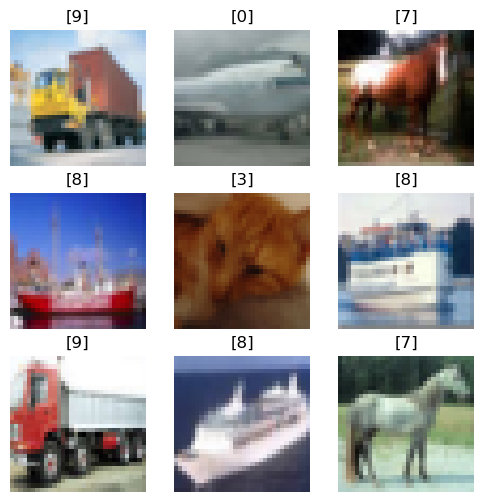

In [17]:
#Lets visualize the CIFAR-10 dataset

import random
figure = plt.figure(figsize=(6,6))

for i in range(9):
  index = random.randint(0,len(X_train)-1) # showing the index_th image
  
  plt.subplot(3,3,i+1)
  plt.imshow(X_train[index])
  plt.title(Y_train[index])
  plt.axis(False)

In [18]:
"""
So you can probably notice here that the images are 3D(coloured) but still 
not of great quality ( what can you expect from 32x32 image). Also there are
certain other factors which makes the classification a bit tougher than the 
cases of 2D( the digit and the fashion data) you dealt before. We will try to
understand the difficulties and find probable solution for them.
"""

'\nSo you can probably notice here that the images are 3D(coloured) but still \nnot of great quality ( what can you expect from 32x32 image). Also there are\ncertain other factors which makes the classification a bit tougher than the \ncases of 2D( the digit and the fashion data) you dealt before. We will try to\nunderstand the difficulties and find probable solution for them.\n'

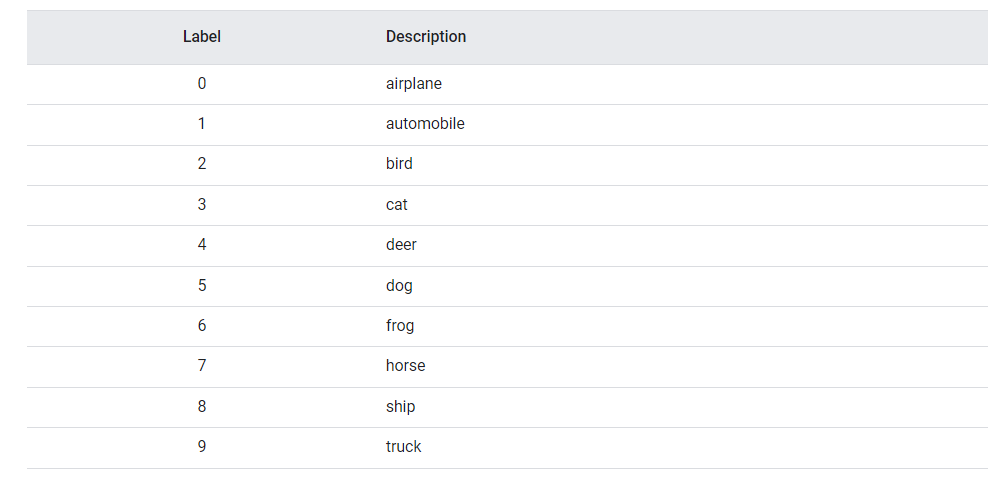

In [19]:
"""
Lets first start with the CNN model discussed in the class for digit
 classification. Notice that I have changed the input shape for this usecase.
 Earlier it was (28,28,1) for the digit dataset.
"""

'\nLets first start with the CNN model discussed in the class for digit\n classification. Notice that I have changed the input shape for this usecase.\n Earlier it was (28,28,1) for the digit dataset.\n'

In [20]:
# model initialization
cnn_model = tf.keras.Sequential()

# adding the 1st layer of CNN
cnn_model.add(tf.keras.layers.Conv2D(26, (5,5), activation = 'relu', input_shape=(32,32,3)))

# adding a maxpooling
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))

#adding another CNN layer
cnn_model.add(tf.keras.layers.Conv2D(16, (5,5), activation = 'relu'))

# adding another maxpooling layer
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))

#flattening the layer
cnn_model.add(tf.keras.layers.Flatten())

# 20 x 20 x 16
#dense layer
cnn_model.add(tf.keras.layers.Dense(64, activation='relu'))

# final layer 
cnn_model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [21]:
cnn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [22]:
"""
Explain what is Adam optimizer below in atleast 250 words.[ read on web and explain ]

Answer:
src link: https://www.kdnuggets.com/2022/12/tuning-adam-optimizer-parameters-pytorch.html#:~:text=Adam%20optimizer%20combines%20%E2%80%9Cgradient%20descent,the%20two%20makes%20it%20powerful.
Adam Optimizer is an algorithm for optimization technique for gradient descent.The method is really efficient when working with large problem involving a lot of data or parameters. It requires less memory and is efficient. Intuitively, it is a combination of the ‘gradient descent with momentum’ algorithm and the ‘RMSP’ algorithm.
This algorithm is used to accelerate the gradient descent algorithm by taking into consideration the ‘exponentially weighted average’ of the gradients. Using averages makes the algorithm converge towards the minima in a faster pace. 
Root mean square prop or RMSprop is an adaptive learning algorithm that tries to improve AdaGrad. Instead of taking the cumulative sum of squared gradients like in AdaGrad, it takes the ‘exponential moving average’
Adam optimizer combines “gradient descent with momentum” and “RMSprop” algorithms. It gets the speed from “momentum” (gradient descent with momentum) and the ability to adapt gradients in different directions from RMSProp. The combination of the two makes it powerful.
Here, we control the rate of gradient descent in such a way that there is minimum oscillation when it reaches the global minimum while taking big enough steps (step-size) so as to pass the local minima hurdles along the way. Hence, combining the features of the above methods to reach the global minimum efficiently. 
"""

'\nExplain what is Adam optimizer below in atleast 250 words.[ read on web and explain ]\n\nAnswer:\n'

### **Make sure that you are connected to GPU runtime other wise the training in next cell is going to take a long time**

In [23]:
history = cnn_model.fit(X_train, Y_train, epochs=10, validation_split=0.2)

Epoch 1/10


c:\Users\91941\anaconda3\lib\site-packages\keras\backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


875/875 [==============================] - 22s 23ms/step - loss: 2.6486 - accuracy: 0.1013 - val_loss: 2.3021 - val_accuracy: 0.1014
Epoch 2/10
875/875 [==============================] - 23s 26ms/step - loss: 2.3016 - accuracy: 0.1029 - val_loss: 2.3019 - val_accuracy: 0.0970
Epoch 3/10
875/875 [==============================] - 20s 23ms/step - loss: 2.3005 - accuracy: 0.1030 - val_loss: 2.2999 - val_accuracy: 0.1031
Epoch 4/10
875/875 [==============================] - 20s 23ms/step - loss: 2.2979 - accuracy: 0.1084 - val_loss: 2.3011 - val_accuracy: 0.1033
Epoch 5/10
875/875 [==============================] - 20s 23ms/step - loss: 2.2988 - accuracy: 0.1056 - val_loss: 2.2685 - val_accuracy: 0.1529
Epoch 6/10
875/875 [==============================] - 23s 26ms/step - loss: 2.3005 - accuracy: 0.1066 - val_loss: 2.3022 - val_accuracy: 0.1010
Epoch 7/10
875/875 [==============================] - 21s 24ms/step - loss: 2.3011 - accuracy: 0.1026 - val_loss: 2.3017 - val_accuracy: 0.1019
Epo

In [24]:
""" 
Write about validation accuracy in 100 words.

Answer: the data can be split as:
Training Data - Train the model
Validation Data - Cross validation for model selection
Testing Data - Test the generalisation error
The validation set helps us to fine-tune our model during training,
While the test set is our ultimate measuring stick of the model or the final testing data kit.
"""

" \nWrite about validation accuracy in 100 words.\n\nAnswer: Validation accuracy is to assess the performance of a machine learning model during training. It measures the accuracy of the model's predictions on a dataset\n        Validation accuracy provides insights into how well the model is generalizing to new, unseen data.\n        A high validation accuracy indicates that the model is performing well\n        A low validation accuracy suggests that the model may be overfitting to the training data, a low validation accuracy suggests that the model may be overfitting to the training data, failing to capture the original patterns and struggling to generalize  and struggling to generalize \n        Validation accuracy is an essential in model evaluating model and selection. It allows for the comparison of different models and used to identify the best-performing configuration.\n"

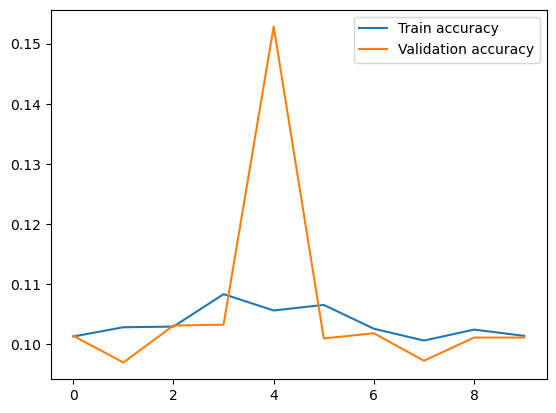

In [25]:
plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

In [26]:
"""
What do you think is happening? Is the model training or not?
 You can see that both the training and validation accuracy are
 just roaming around 0.1. 
 One reason for this can be our model architecture. We had 26 filters
 in our first layer and 16 filters in our next layer. This funnel down approach
 works for dense layers but for Conv layers( which are good at feature extraction)
 we want them to extract more and more features.

 So lets change that to funne up --> 16 and 32 in the layers respectively
"""

'\nWhat do you think is happening? Is the model training or not?\n You can see that both the training and validation accuracy are\n just roaming around 0.1. \n One reason for this can be our model architecture. We had 26 filters\n in our first layer and 16 filters in our next layer. This funnel down approach\n works for dense layers but for Conv layers( which are good at feature extraction)\n we want them to extract more and more features.\n\n So lets change that to funne up --> 16 and 32 in the layers respectively\n'

In [27]:
# model initialization
cnn_model = tf.keras.Sequential()

"""adding the 1st layer of CNN(Changed)"""
cnn_model.add(tf.keras.layers.Conv2D(16, (5,5), activation = 'relu', input_shape=(32,32,3)))

# adding a maxpooling
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))

"""adding the 2nd layer of CNN(Changed)"""
cnn_model.add(tf.keras.layers.Conv2D(32, (5,5), activation = 'relu'))

# adding another maxpooling layer
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))

#flattening the layer
cnn_model.add(tf.keras.layers.Flatten())

# 20 x 20 x 16
#dense layer
cnn_model.add(tf.keras.layers.Dense(64, activation='relu'))

# final layer 
cnn_model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [28]:
cnn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [29]:
history = cnn_model.fit(X_train, Y_train, epochs=20, validation_split=0.2)

Epoch 1/20
875/875 [==============================] - 19s 20ms/step - loss: 2.7020 - accuracy: 0.1808 - val_loss: 1.8890 - val_accuracy: 0.2876
Epoch 2/20
875/875 [==============================] - 17s 20ms/step - loss: 1.8116 - accuracy: 0.3292 - val_loss: 1.7648 - val_accuracy: 0.3613
Epoch 3/20
875/875 [==============================] - 19s 22ms/step - loss: 1.6496 - accuracy: 0.3974 - val_loss: 1.6382 - val_accuracy: 0.4036
Epoch 4/20
875/875 [==============================] - 29s 33ms/step - loss: 1.5614 - accuracy: 0.4342 - val_loss: 1.5993 - val_accuracy: 0.4340
Epoch 5/20
875/875 [==============================] - 30s 34ms/step - loss: 1.4968 - accuracy: 0.4618 - val_loss: 1.5289 - val_accuracy: 0.4564
Epoch 6/20
875/875 [==============================] - 30s 34ms/step - loss: 1.4221 - accuracy: 0.4931 - val_loss: 1.5153 - val_accuracy: 0.4784
Epoch 7/20
875/875 [==============================] - 30s 34ms/step - loss: 1.3526 - accuracy: 0.5182 - val_loss: 1.4344 - val_accuracy:

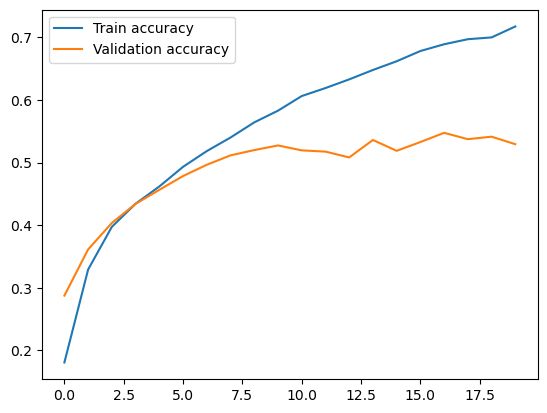

In [30]:
plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

In [31]:
"""
Did our model improved??
Are we done with the job?
What is happening after 5( roughly ) epochs? Why is there a gap between
training and validation accuracy?

Our training accuracy reached to 0.73( and still increasing ) but 
the validation accuracy seems to stagnate at 0.52.

Is our model overfitting on the training data so much that it can't work well 
on unseen data.
"""

"\nDid our model improved??\nAre we done with the job?\nWhat is happening after 5( roughly ) epochs? Why is there a gap between\ntraining and validation accuracy?\n\nOur training accuracy reached to 0.73( and still increasing ) but \nthe validation accuracy seems to stagnate at 0.52.\n\nIs our model overfitting on the training data so much that it can't work well \non unseen data.\n"

In [32]:
"""
How are we gonna tackel this problem?
Well, we will see that in next part of this assignment.
Till then lets learn about about overfitting.
"""

'\nHow are we gonna tackel this problem?\nWell, we will see that in next part of this assignment.\nTill then lets learn about about overfitting.\n'

> **Well using Chatgpt to answer these question is something which everyone can think of right?? To create a difference write answer in your own terms after reading from web or reading the answer of Chatgpt.**
### **After all this is your midterm evaluation. Cheating is something we can catch easily** ( we have also done this )

# please take note of this change: 
**[For all the subjective questions after this question( in the ss ) you need put the link of articles that you referred while searching about the question.]**\
Ideally you should refer to at least 2 articles for each of those questions.\
Also you do not need to go into deep maths of those( a qualitative answer is what we will be looking for)

In [33]:
"""
[CLARIFICATION]: Reading and understanding by searching on Chatgpt is not 
considered as cheating as long as you are writing that in your own word
( only problem is the crediblity of its information)

"""

'\n[CLARIFICATION]: Reading and understanding by searching on Chatgpt is not \nconsidered as cheating as long as you are writing that in your own word\n( only problem is the crediblity of its information)\n\n'

In [34]:
"""
Question: What is overfitting and underfitting below ( atleast 200 words )
 
Answer:   Overfitting and underfitting are two phenomena in machine learning that occur when a model fails to generalize well.
          

          Underfitting occurs when there is still room for improvement on the train data. 
          This can happen for a number of reasons: If the model is not powerful enough, is over-regularized, or has simply not been trained long enough.
          This means the network has not learned the relevant patterns in the training data
          Reasons for underfiiting include:
          The size of the training dataset used is not enough.
          The model is too simple.
          Training data is not cleaned and also contains noise in it.
          Techniques to reduce underfitting:
          Increase the number of features, performing feature engineering
          Remove noise from the data.
          Increase the number of epochs.

          
          A model is said to be overfitted when the model does not make accurate predictions on testing data.
          When a statistical model is overfitted, it means it doesn't make accurate predictions on new and unseen data. This happens when the model learns too much from the data it was trained on.
          When we test the model with different data, it doesn't work well because it learned too many tiny details and noise of previous dataset.
          In this case, train error is very small and val/test error is large.
          Reasons:
          The model is too complex
          The size of the training data
          Techniques to reduce overfitting:
          Techniques to reduce overfitting:
          Increase training data.
          Reduce model complexity.
          Early stopping during the training phase (have an eye over the loss over the training period as soon as loss begins to increase stop training).


          @geeksforgeeks
"""

'\nQuestion: What is overfitting and underfitting below ( atleast 200 words )\n \nAnswer:   Overfitting and underfitting are two phenomena in machine learning that occur when a model fails to generalize well.\n          \n          Underfitting means that  model makes accurate, but initially incorrect predictions. In this case, train error is large and val/test error is large too.\n          A model is said to have underfitting when it cannot capture the underlying trend of the data i.e., it only performs well on training data but performs poorly on testing data.\n          underfitting include high training error and high validation error or test error\n          \n          A model is said to be overfitted when the model does not make accurate predictions on testing data.\n          A solution to avoid overfitting is using a linear algorithm if we have linear data or using the parameters like the maximal depth if we are using decision trees. \n          Overfitting means that  model 

In [35]:
"""
Question: What are regularization techniques in machine learning?(200 words)

Answer:
So as to prevent overfitting in amodel and improve the performance of the model, increase accuracy and reduce losses,Regularization techniques are used.
It controls the complexity of model and try to reduce the influence of the noice.
All the features and variables of the model remain intact and reducing the magnitude of the variables, hence maintaing the generalization of the model.Or we can say is that,
it normalizes and moderates weights attached to a feature or a neuron so that algorithms do not rely on just a few features or neurons to predict the result.
Some of the common regularization techniques include:
Lasso
Ridge
Elastic
Dropout layer
Early stopping
"""

'\nQuestion: What are regularization techniques in machine learning?(200 words)\n\nAnswer: \n'

In [36]:
"""
Question: What dropout layer and what does it do?( read it from Tensorflow.org and write in 200 words)

Answer: 
The Dropout layer randomly sets a fraction of input units to 0 during each training step, which helps to prevent overfitting by introducing noise and reducing the reliance of the network on specific input features. 
The frequency of dropping units is determined by the rate parameter.
To compensate for the dropped units, the remaining non-zero units are scaled up by a factor of 1/(1 - rate) during training.
This scaling ensures that the overall sum of the inputs remains approximately the same, which helps to maintain the magnitudes of the inputs and avoid introducing bias in subsequent layers.
Importantly, the Dropout layer only applies this random dropping and scaling behavior when the training flag is set to True. 
During inference or when using the model for prediction, the Dropout layer does not drop any values and does not perform any scaling.
This ensures consistent behavior when using the model in different contexts.
Regarding the trainable parameter, setting it to False for a Dropout layer does not affect its behavior. 
The Dropout layer does not have any learnable weights or variables that can be frozen during training, so the trainable parameter has no effect on the layer's functionality. It is mainly used for other types of layers that do have trainable parameters, allowing you to control whether those parameters are updated during training or not.







"""

'\nQuestion: What dropout layer and what does it do?( read it from Tensorflow.org and write in 200 words)\n\nAnswer: \n'

In [37]:
"""
Question: What is L1 normalization? write its formulae as well( atleast 200 words )

Answer:
L1 normalization, also known as L1 regularization or Lasso regularization, is a method used in machine learning and optimization.
It is a data regularization technique.
It involves adding a penalty term to the loss function based on the L1 norm of the model's weights.
The L1 norm measures the total magnitude of the weights by summing up their absolute values.
L1_norm = |x₁| + |x₂| + ... + |xₙ|
L1 normalization transforms the original vector into a unit vector.
L1 normalized of a vector x' is obtained by dividing each element by the L1 norm:x' = [x₁ / L1_norm, x₂ / L1_norm, ..., xₙ / L1_norm],
This regularization technique can prevent overfitting, enhance the model's generalization, 
and facilitate feature selection by driving some weights to zero.
@chatgpt
"""

"\nQuestion: What is L1 normalization? write its formulae as well( atleast 200 words )\n\nAnswer:L1 normalization is a nomalization technique that modifies the dataset values in a way that in each row the sum of the absolute values will always be up to 1,\n       L1 normalization transforms the original vector into a unit vector \n       L1 normalized of a vector x' is obtained by dividing each element by the L1 norm:x' = [x₁ / L1_norm, x₂ / L1_norm, ..., xₙ / L1_norm],L1_norm = |x₁| + |x₂| + ... + |xₙ|\n       @chatgpt\n"

In [38]:
"""
Question: What is L2 normalization? write its formulae as well( atleast 200 words )

Answer: L2 normalization is a normalization  process used to scale a vector by its L2 norm. 
        The L2 norm is calculated as the square root of the sum of the squares of the individual elements in the vector.
        By adding the L2 norm as a penalty term to the loss function, the optimization process is encouraged to minimize the squared magnitude of the weights.
        Let vector x = [x₁, x₂, ..., xₙ], the L2 normalized vector x' is obtained by dividing each element by its L2 norm:
        x' = [x₁ / L2_norm, x₂ / L2_norm, ..., xₙ / L2_norm]
        where L2_norm is = sqrt(x₁² + x₂² + ... + xₙ²)
        During training, the L2 regularization term is added to the loss function, and the objective becomes to minimize the combined loss and regularization term.
        The regularization term introduces a bias towards smaller weights, as larger weights would contribute more to the overall loss. 
        This helps to prevent overfitting and improve the generalization ability of the model by discouraging overly complex weight configurations.
        @chatgpt
"""

"\nQuestion: What is L2 normalization? write its formulae as well( atleast 200 words )\n\nAnswer: L2 normalization is a normalization  process used to scale a vector by its L2 norm. \n        The L2 norm is calculated as the square root of the sum of the squares of the individual elements in the vector.\n        Let vector x = [x₁, x₂, ..., xₙ], the L2 normalized vector x' is obtained by dividing each element by its L2 norm:\n\n        x' = [x₁ / L2_norm, x₂ / L2_norm, ..., xₙ / L2_norm]\n\n        where L2_norm is = sqrt(x₁² + x₂² + ... + xₙ²)\n        @chatgpt\n"

In [39]:
"""
Question: What is data augmentation techniques and why is it needed in machine learning?( atleast 200 words )

Answer: 
Data augmentation is a technique of artificially increasing the training set by creating modified copies of a dataset using existing data. 
It includes making minor changes to the dataset or using deep learning to generate new data points. 
To prevent models from overfitting.
The initial training set is too small.
To improve the model accuracy.
To Reduce the operational cost of labeling and cleaning the raw dataset. 
One of the steps in a data model is cleaning data which is necessary for high-accuracy models.
However, if cleaning reduces the representability of data, then the model cannot provide good predictions for real-world inputs.
Data augmentation techniques can enable machine learning models to be more robust by creating variations that the model may see in the real world.
For data augmentation, making simple alterations on visual data is done.
In addition, generative adversarial networks (GANs) are used to create new synthetic data. 
Src: https://www.datacamp.com/tutorial/complete-guide-data-augmentation and ChatGPT
"""

'\nQuestion: What is data augmentation techniques and why is it needed in machine learning?( atleast 200 words )\n\nAnswer: \n'

####**Did you take note of the change in the cell at the start of these subjective questions ?**

In [40]:
"ANS(Yes/No):    Yes"

'ANS(Yes/No):    Yes'